# 🍷 Agrupamento de vinhos com KMeans

### Carregando a base de dados e as bibliotecas

In [84]:
from sklearn.datasets import load_wine

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [85]:
data = load_wine()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

### 1 - Análise Exploratória (EDA)

In [86]:
df.shape

(178, 13)

In [87]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [88]:
types = data.target
np.unique(types)

array([0, 1, 2])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [90]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [91]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


- Sem valores faltantes ou nulos e todas as features são valores float
- A classificação já contida na base de dados, feitas por especialistas em vinho, prevê 3 clusters
- A feature proline tem uma variância alta

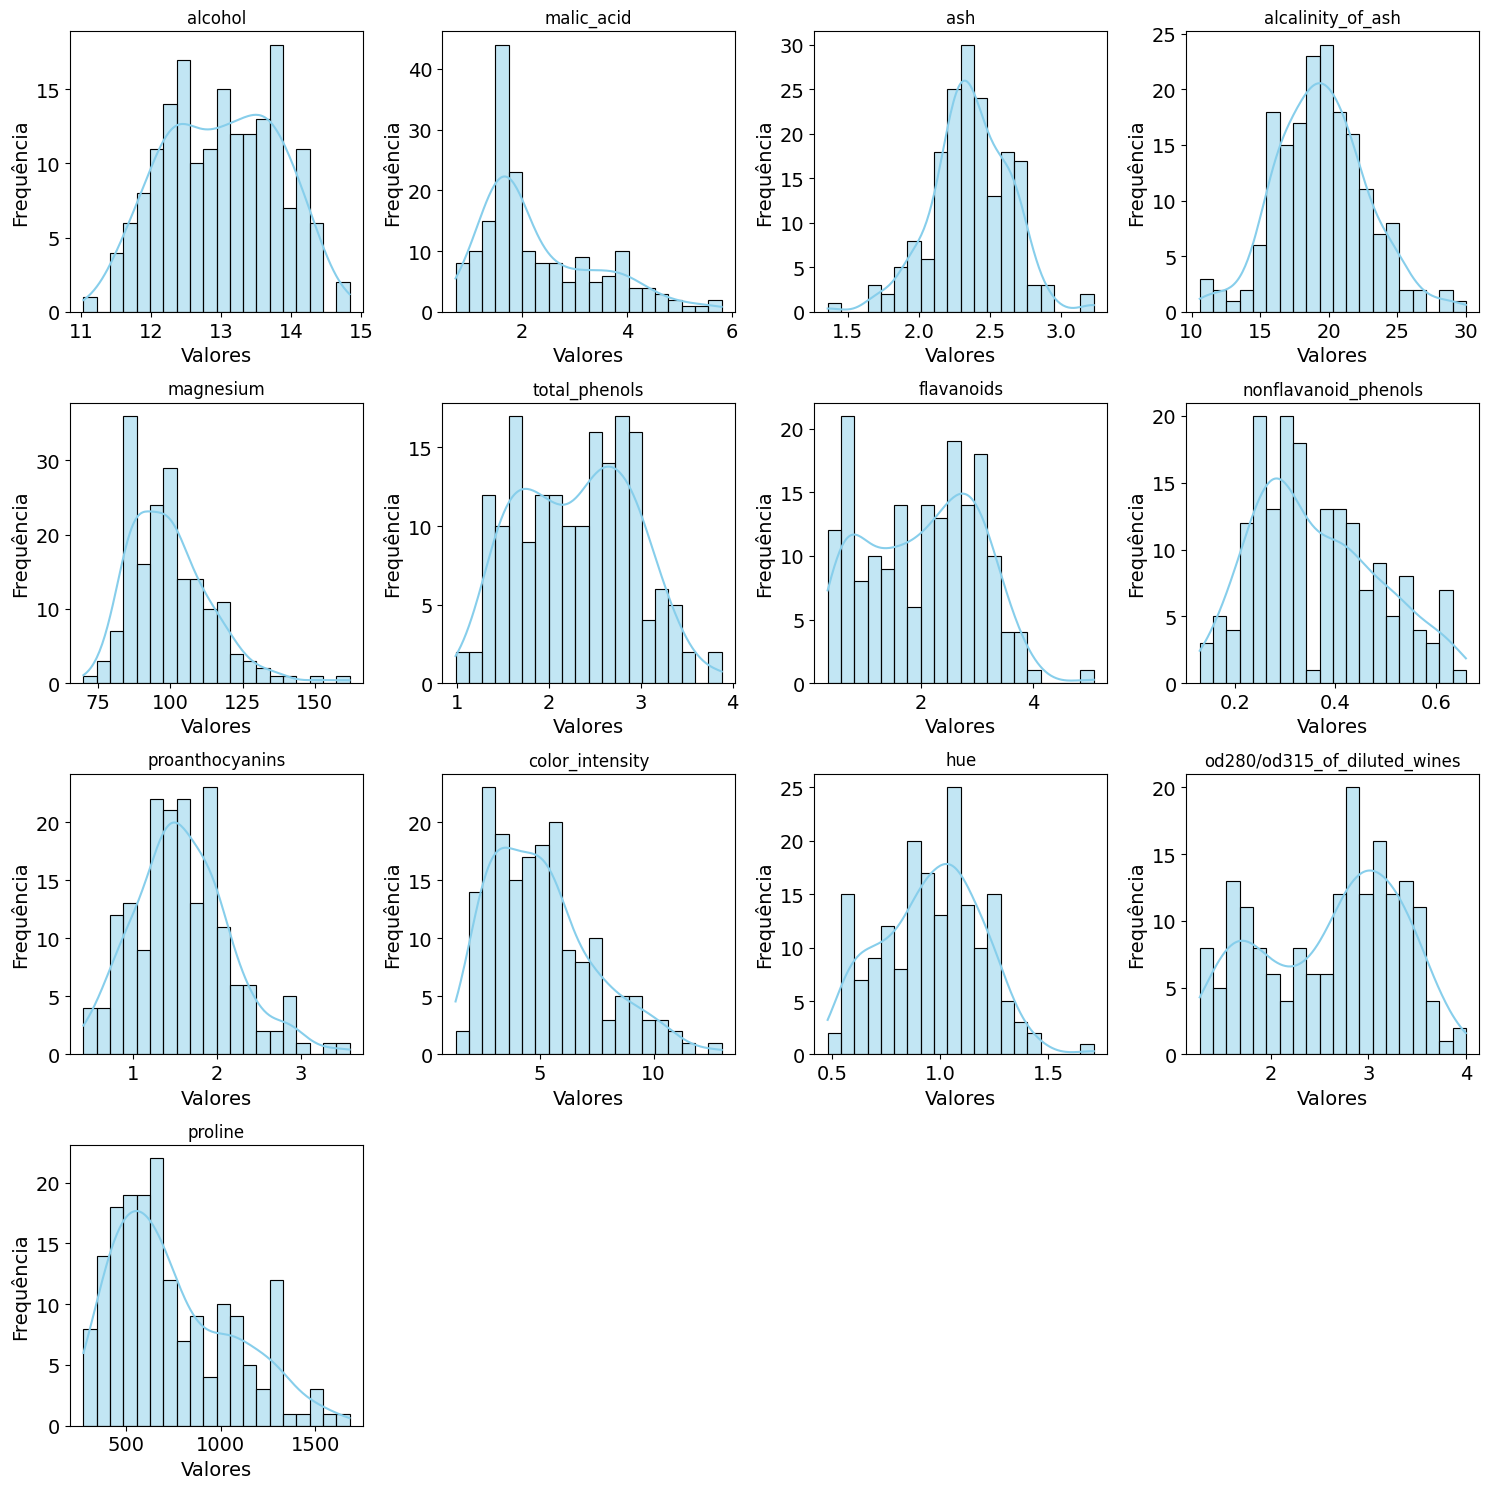

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(data=df, x=col, bins=20, kde=True,
                 color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='both', labelsize=14)  
    ax.set_xlabel('Valores', fontsize=14)
    ax.set_ylabel('Frequência', fontsize=14)
    
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

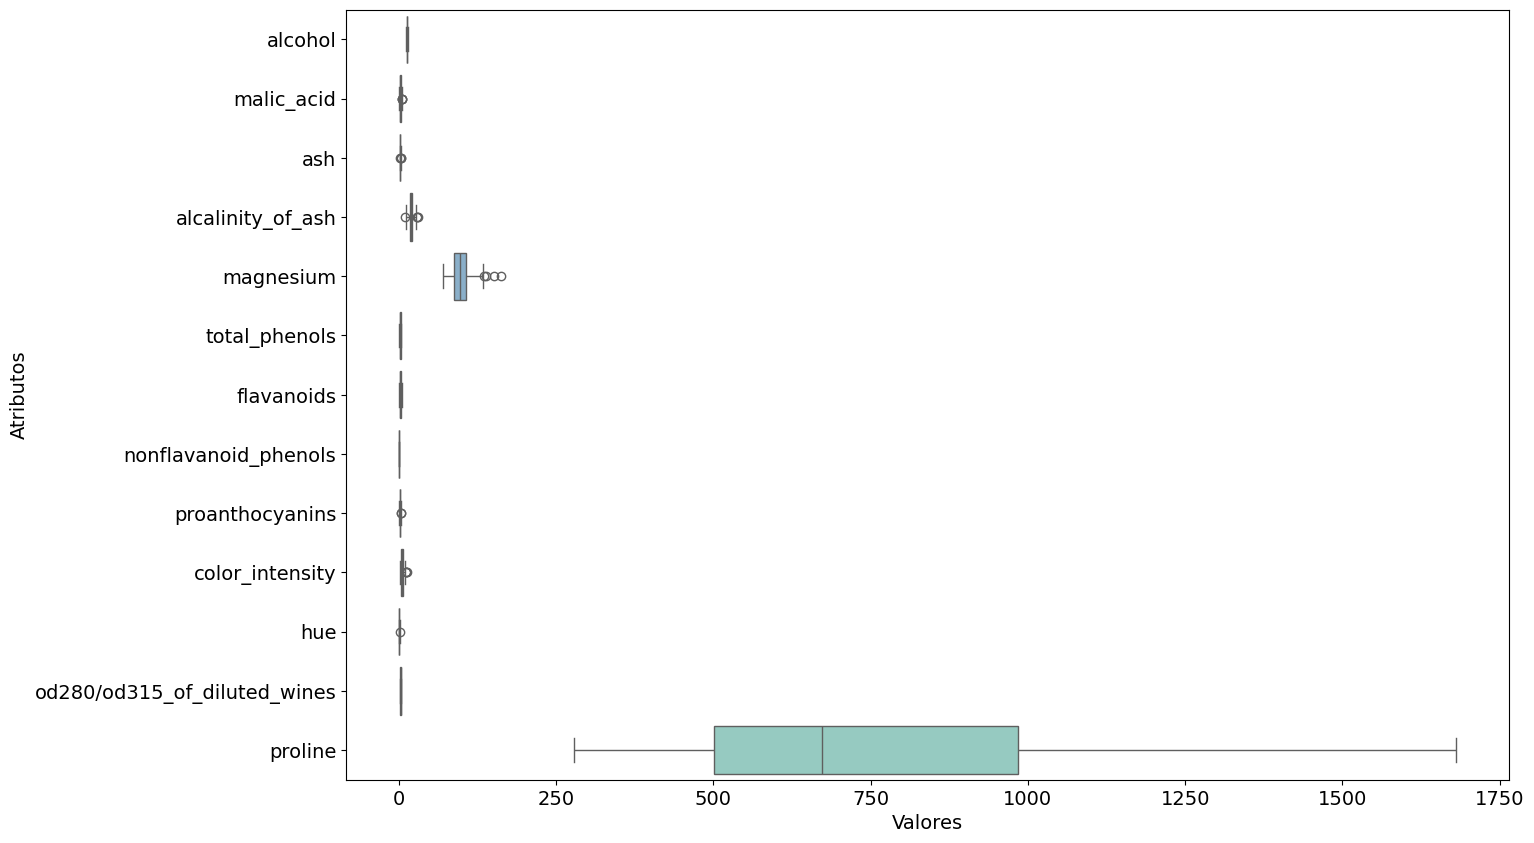

In [93]:
# Definir tamanho da figura
plt.figure(figsize=(15, 10))

# Criar box plot
sns.boxplot(data=df, orient='h', palette='Set3')
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Atributos', fontsize=14)
plt.tick_params(axis='both', labelsize=14)  

plt.show()

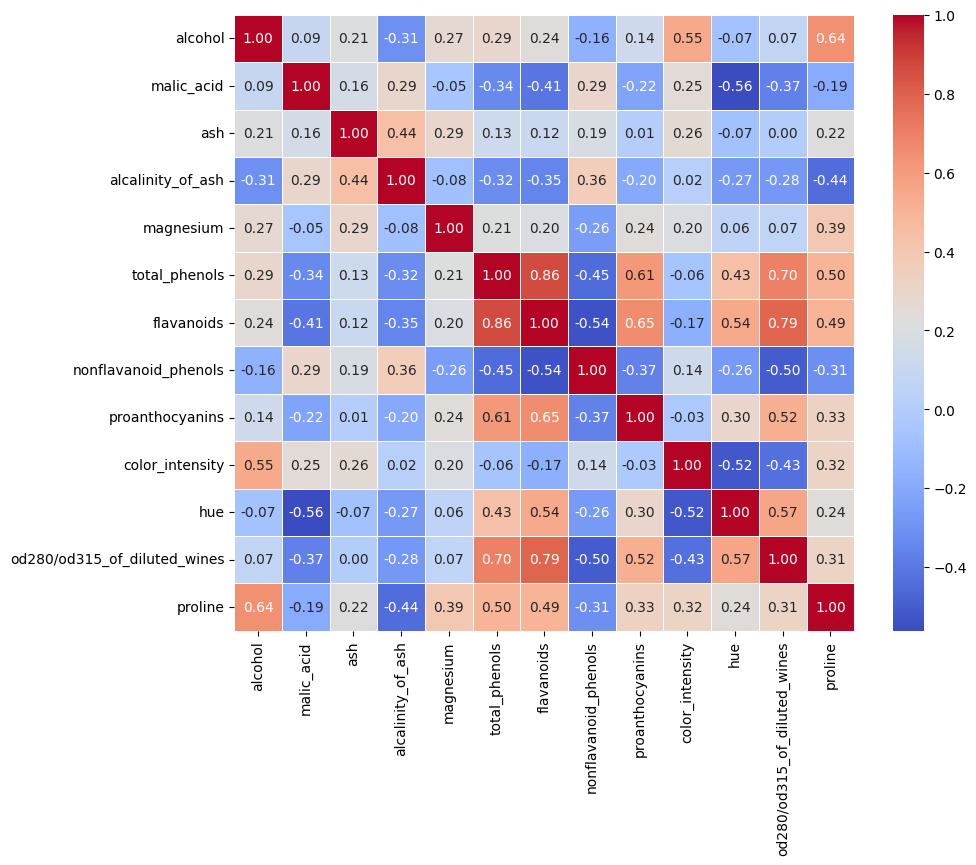

In [94]:
# Calcular a matriz de correlação
corr = df.corr()

# Configurar a figura do matplotlib
plt.figure(figsize=(10, 8))

# Desenhar o mapa de calor com a máscara e a proporção de aspecto correta
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.show()

- Pode-se constatar a alta variância de proline prejudicando a interpretação das outras features
- O heatmap de correlação mostrou correlações interessantes tanto positivas quanto negativas, com a feature flavanoids e total_phenols(0.86) tem a maior correlação da base seguido por flavanoids e od280/od315_of_diluted_wines(0.79)
- Feature flavanoids tem correlações interessantes com diversas outras. O que pode ser prejudicial ao utilizar uma modelo, tendo como consequencia o aumento de complexidade sem aumentar a variância das informações

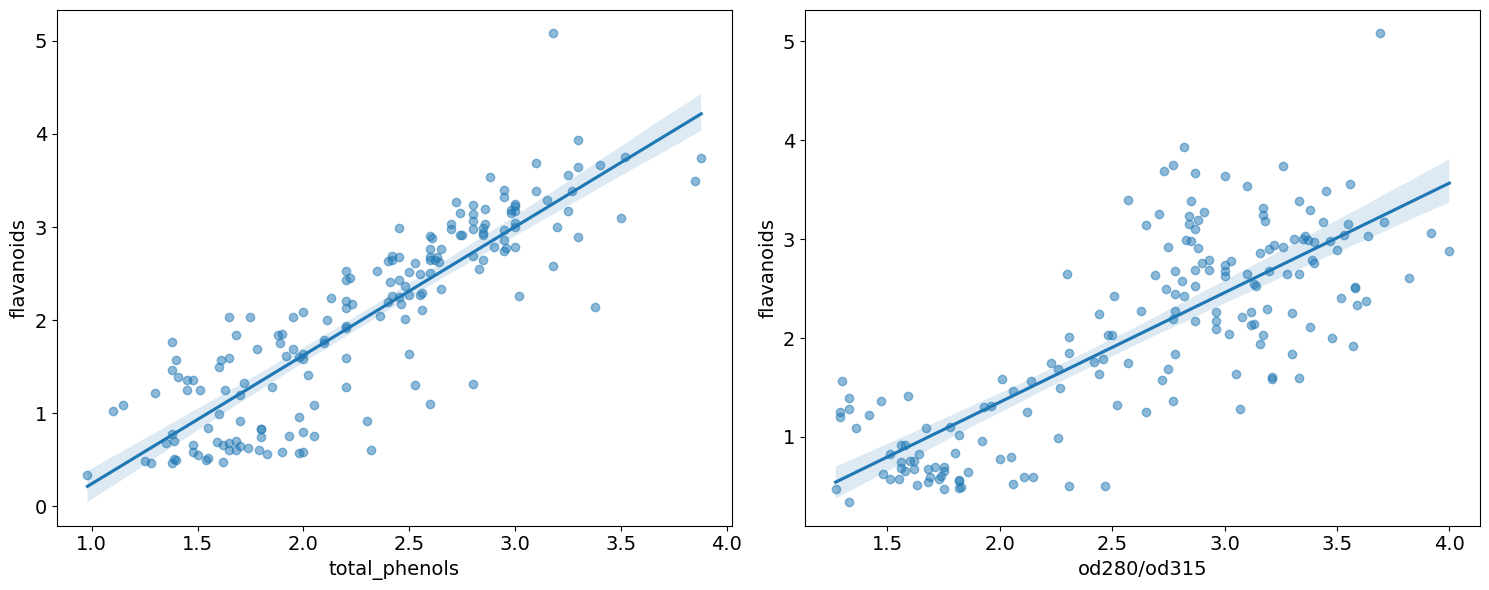

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.regplot(x='total_phenols', y='flavanoids', data=df, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='od280/od315_of_diluted_wines', y='flavanoids', data=df, scatter_kws={'alpha':0.5}, ax=axes[1])
axes[0].tick_params(axis='both', labelsize=14)  
axes[1].tick_params(axis='both', labelsize=14) 

axes[0].set_ylabel('flavanoids', fontsize=14)
axes[0].set_xlabel('total_phenols', fontsize=14)

axes[1].set_ylabel('flavanoids', fontsize=14)
axes[1].set_xlabel('od280/od315', fontsize=14)



plt.tight_layout()  
plt.show()

### 2 - Pré-processamento

- A presença de variações amplas nos dados pode impactar negativamente o desempenho dos modelos, tanto os supervisionados, quanto os não supervisionados, como o K-Means. Isso ocorre porque atributos com maior variação ganham maior peso no ajuste dos modelos.
- Para contornar isso geralmente utiliza-se técnicas de normalização ou padronização dos dados. Então vamos padronizar as variáveis, ajustando-as para uma escola comum, com média zero e desvio padrão um.

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


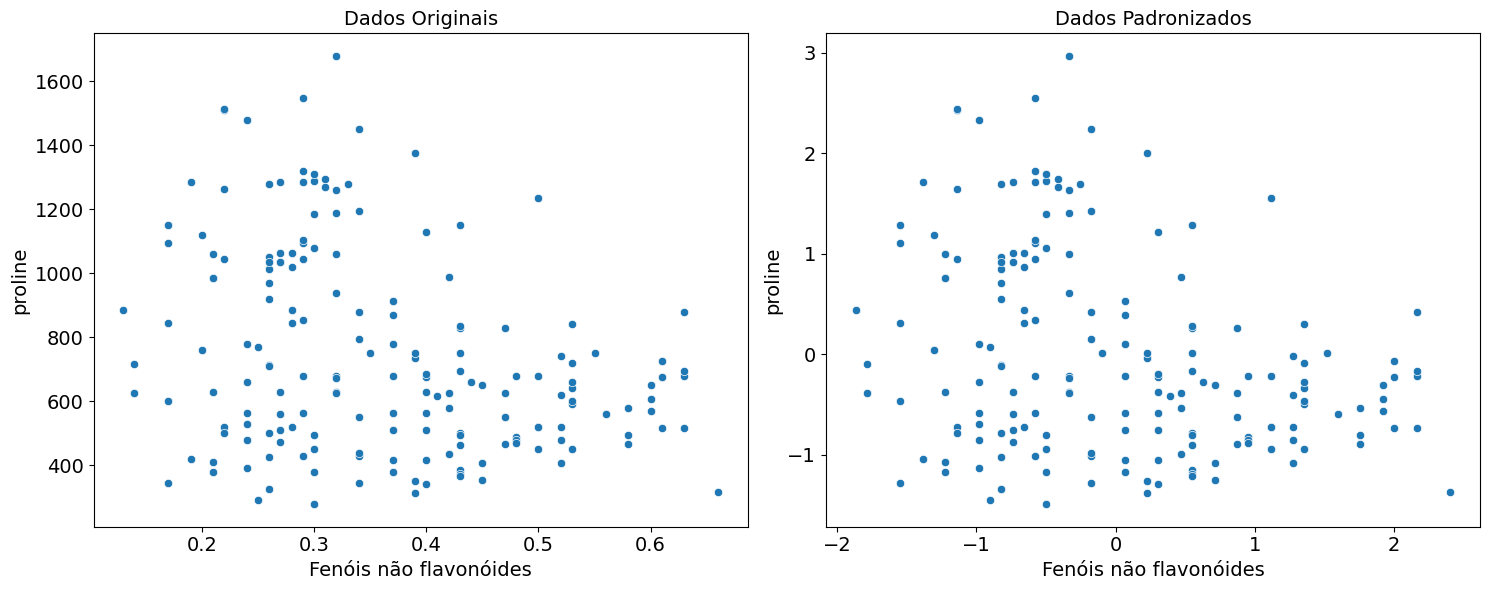

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df, x='nonflavanoid_phenols', y='proline', ax=axes[0])
axes[0].set_title('Dados Originais', fontsize=14)
axes[0].set_xlabel('Fenóis não flavonóides', fontsize=14)
axes[0].set_ylabel('proline', fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)  

sns.scatterplot(data=df_scaled, x='nonflavanoid_phenols', y='proline', ax=axes[1])
axes[1].set_title('Dados Padronizados', fontsize=14)
axes[1].set_xlabel('Fenóis não flavonóides', fontsize=14)
axes[1].set_ylabel('proline', fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)  

plt.tight_layout()
plt.show()

In [98]:
df_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### 3 - Treinamento e Clusterização

In [99]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pipeline = Pipeline([  
    ('scaler', StandardScaler()),  
    ('model', KMeans(n_clusters=2, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=42, copy_x=True, algorithm='lloyd'))
]) 

clusters = pipeline.fit_predict(df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [100]:
cluster_centers = pipeline.named_steps['model'].cluster_centers_
print(cluster_centers)

[[ 0.09447903 -0.36711293 -0.07779738 -0.30522142  0.09295176  0.61866437
   0.67113905 -0.4893702   0.48082134 -0.27775689  0.48477674  0.67836411
   0.32250949]
 [-0.14238388  0.5532547   0.11724395  0.45998158 -0.14008223 -0.93235334
  -1.01143491  0.73750157 -0.72461808  0.41859138 -0.73057903 -1.02232338
  -0.48603544]]


In [101]:
cluster_centers_orig = scaler.inverse_transform(cluster_centers)
cluster_centers_orig

array([[1.30771028e+01, 1.92738318e+00, 2.34523364e+00, 1.84785047e+01,
        1.01065421e+02, 2.68121495e+00, 2.69775701e+00, 3.01121495e-01,
        1.86532710e+00, 4.41598131e+00, 1.06794393e+00, 3.09196262e+00,
        8.48168224e+02],
       [1.28853521e+01, 2.95267606e+00, 2.39859155e+00, 2.10267606e+01,
        9.77464789e+01, 1.71323944e+00, 1.02183099e+00, 4.53380282e-01,
        1.17732394e+00, 6.02577463e+00, 7.90929577e-01, 1.88788732e+00,
        5.94267606e+02]])

In [102]:
cluster_sizes = np.bincount(clusters)
print(cluster_sizes)

[107  71]


In [103]:
df_ct = pd.DataFrame({'clusters': clusters, 'wine_types': types})
ct = pd.crosstab(df_ct['clusters'], df_ct['wine_types'])
print(ct)

wine_types   0   1   2
clusters              
0           59  48   0
1            0  23  48


- Obviamente a quantidade ideal de cluster é 3, pois os especialistas classificaram esses vinhos em 3 diferentes tipo, mas e caso não tivesse tão obvio assim? 
- Precisariamos encontrar a quantidade ideal. Para isso existe métodos como cotovelo, Silhouette ou Davies-Bouldin Index (DBI) . Aqui será usado o do cotovelo.

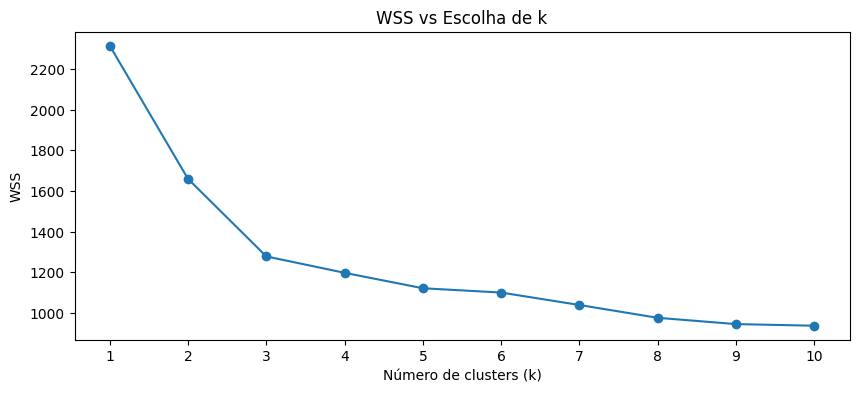

In [104]:
wss = []

np.random.seed(0)

range_clusters = range(1, 11)
for i in range_clusters:
    
    kmeans = KMeans(n_clusters=i, random_state=0)

    pipeline = Pipeline([  
    ('scaler', StandardScaler()),  
    ('model', kmeans)   
    ]) 
    
    pipeline.fit(df)
    
    wss.append(pipeline.named_steps['model'].inertia_)


plt.figure(figsize=(10, 4))
plt.plot(range_clusters, wss, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WSS')
plt.title('WSS vs Escolha de k')
plt.xticks(range_clusters)
plt.show()

- Como era de se esperar, o numero ideal de cluster por esse método é 3. Ele consiste em visualizar o numero onde o gráfico forma um cotovelo, que é onde a variação de WSS começa a se manter quase constante.

In [105]:
kmeans_k3 = KMeans(n_clusters=3, random_state=0)

pipeline = Pipeline([  
    ('scaler', StandardScaler()),  
    ('model', kmeans_k3)   
    ]) 
    
clusters_k3 = pipeline.fit_predict(df)

In [106]:
df['cluster'] = clusters_k3

In [107]:
cluster_means = df.groupby('cluster').mean()
cluster_means

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


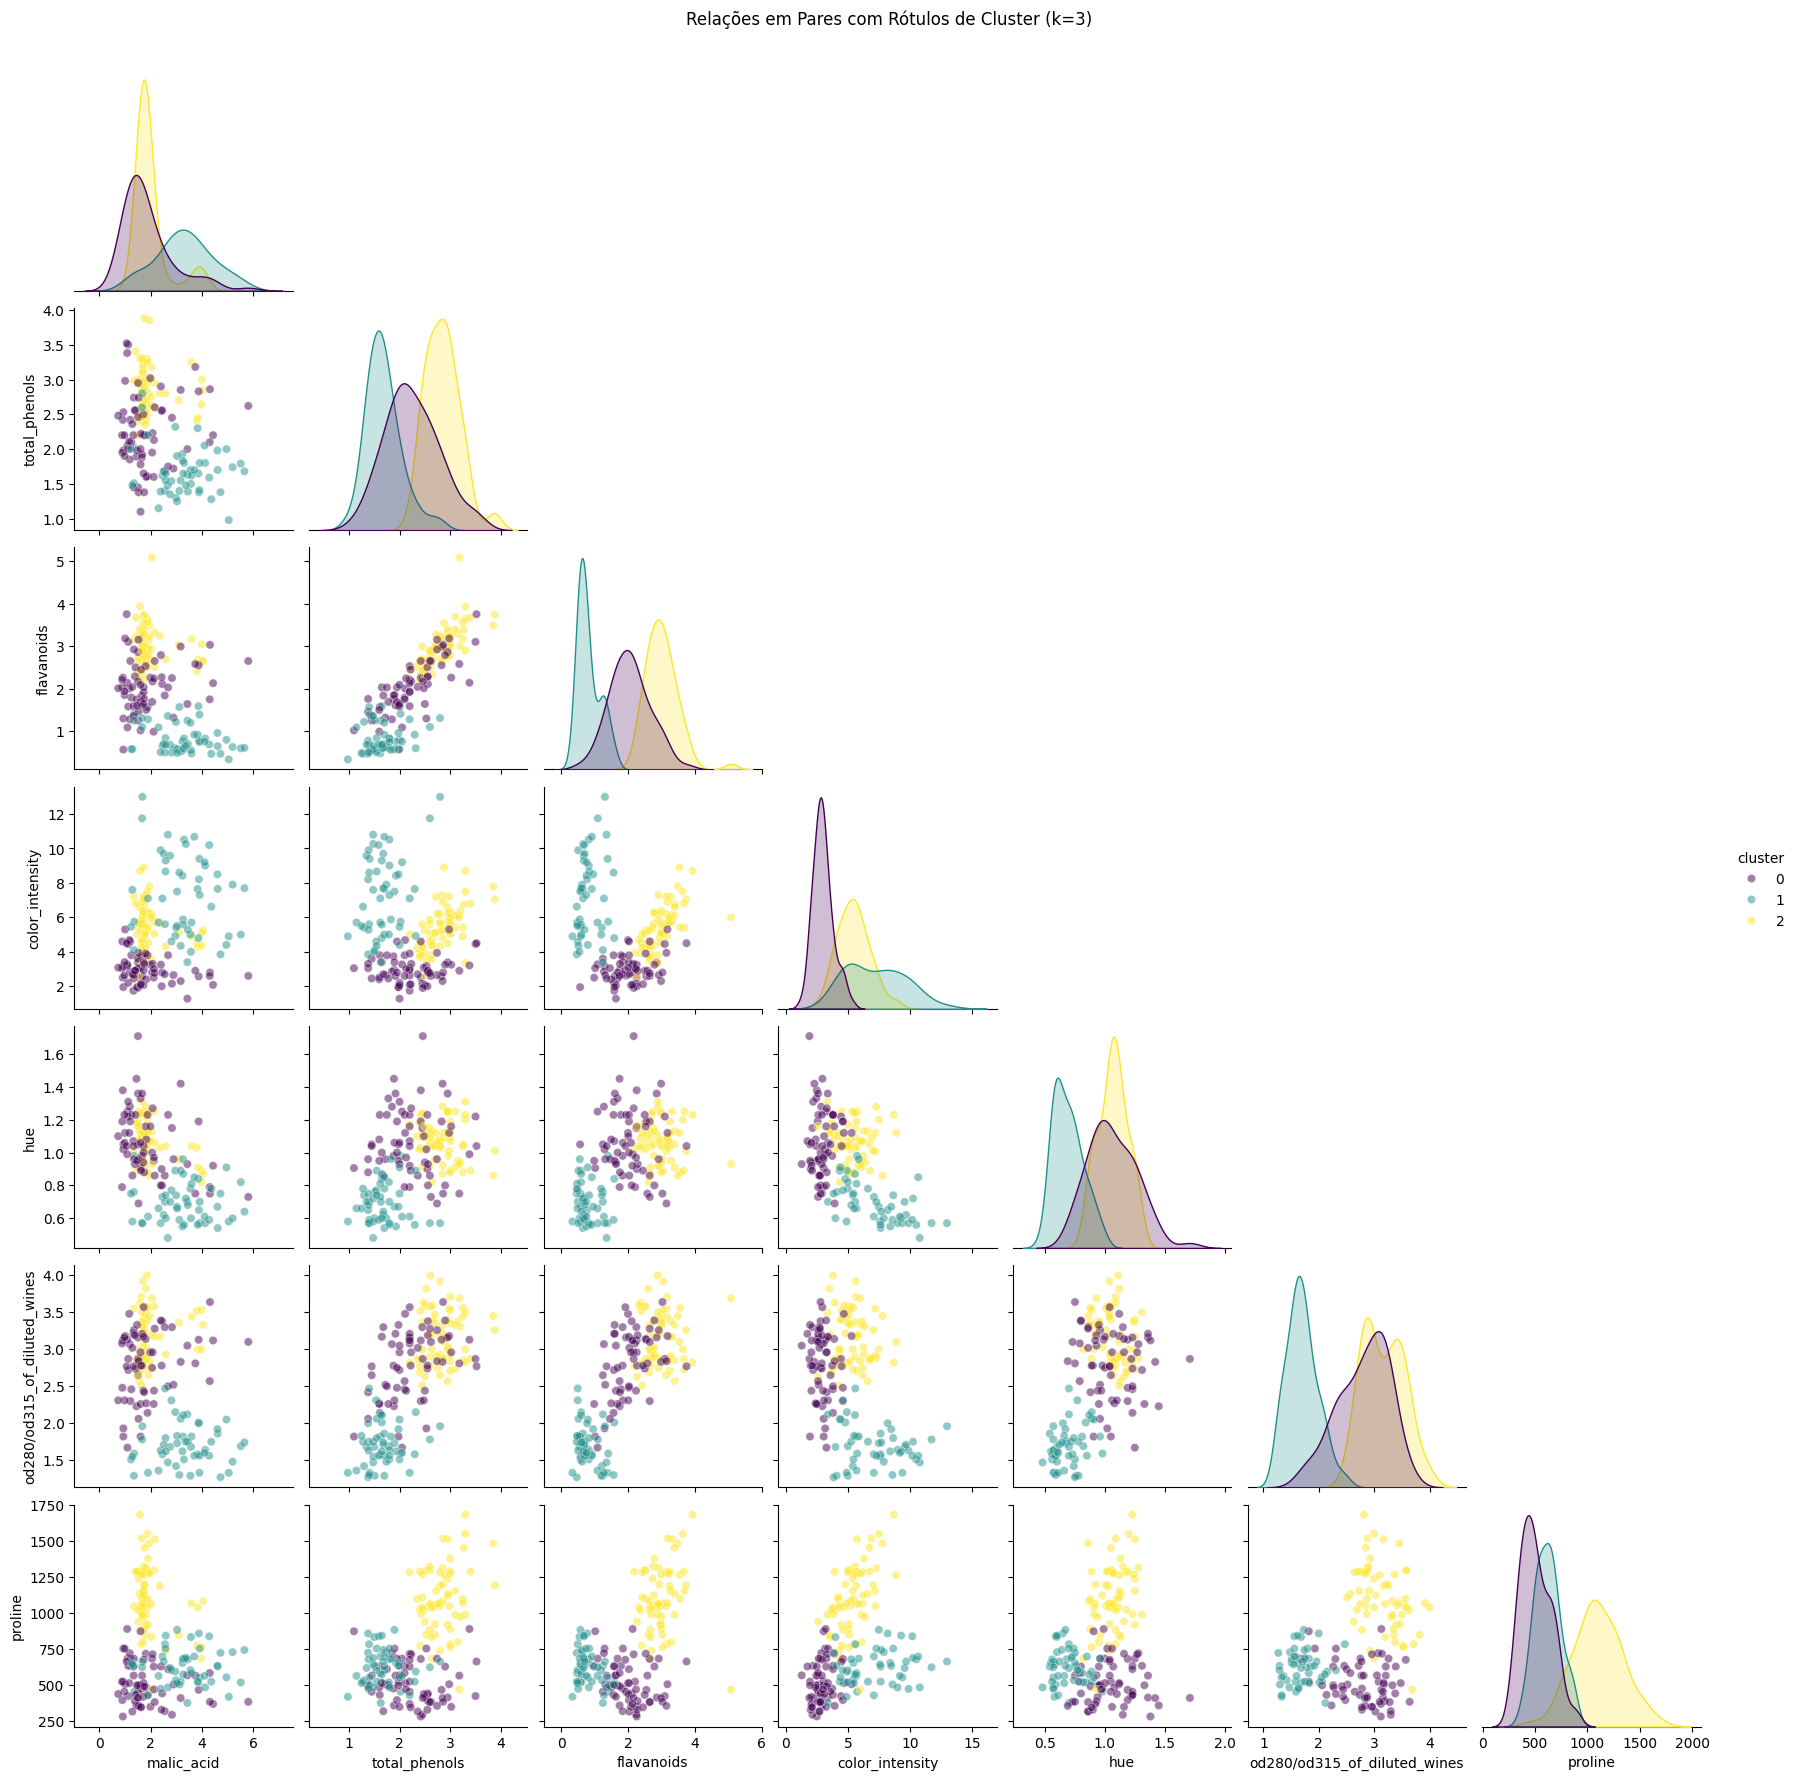

In [108]:
cols = ['malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline']

sns.pairplot(df, vars=cols, hue='cluster', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.5}, corner='upper')

plt.suptitle('Relações em Pares com Rótulos de Cluster (k=3)', y=1.02)
plt.show()

In [109]:
df_ct = pd.DataFrame({'clusters': clusters_k3, 'wine_types': types})
ct = pd.crosstab(df_ct['clusters'], df_ct['wine_types'])
print(ct)

wine_types   0   1   2
clusters              
0            0  65   0
1            0   3  48
2           59   3   0


### 4 - Resultados

- Esse foi um projeto bem curto e mais exploratório para buscar mais familiaridade com o modelo KMeans. Os dados de vinhos do load_wine do Sklearn permite ter um entendimento mais prático como o KMeans funciona.
- Foi possível também visualizar a importancia da EDA para uma etapa inicial do projeto, identificar dados fora dos padrões, nesse caso a alta variancia de uma feature e analisar o impacto que ela pode causar no modelo.
- A etapa de pré processamento também foi bastante importante para o resultado final, em dados com alta variança, normalizar significa economia de tempo com um modelo menos complexo do que o necessário e capaz de generalizar melhor.
- Em modelos de aprendizagem supervisionada existem os rotulos que podem ser valores numericos ou categóricos que ajudam a identificar se a saída do modelo está certa ou errada ou quão perto está. Nesse caso com o KMeans não é possível ter esses rótulos, apesar de a base ter o rotulos dos especialistas, mas em muitos casos não se tem esse tipo de dado. Então utilizar técnicas para descobrir a quantidade ideal de cluster é importante para dar um ponta pé inicial. Nesse caso em especifico era obvio a quantidadade ideal de cluster, mas 'chutando' inicialmente n_cluster=2 pode-se ver que a saída do modelo não é a ideal e com n_cluster=3 ele se ajustou muito bem e nos deus uma ideia interessante do agrupamento desses dados em seus respectivos clusters.
- Por fim, podemos ver que o modelo até que se saiu bem. Conseguiu separar os cluster bem próximo daquilo que os especialistas fizeram, manter uma menor distancia entre pontos de mesmo cluster e a maior distancia possivel entre cluster para certas features, que são as que podem explicar melhor os dados como proline e od280/od315 ou proline e hue, são features que podem carregar bastante informação e ajudam o modelo a fazer a clusterização. A base ter várias features também torna esse trabalho mais dificil, talvez uma diminuição de dimensionalidade com PCA ajudasse bastante.